In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import torchvision.datasets as datasets

# The MNIST dataset
The MNIST dataset contains 60000 handwritten digits in a 28x28 pixel array of values between 0-1. This is a classical ML training/testing dataset due to the simplicity of the features and the ability to quickly diagnose ML architectures.

In [2]:
MNISTdataset = datasets.MNIST(root="./mnist", train=True, download=True)

In [3]:
# Load all the image labels
labels = np.zeros(len(MNISTdataset))

for i, (img, label) in enumerate(tqdm.tqdm(MNISTdataset)):
    labels[i] = label

100%|█████████████████████████████████████████████████████████████████████████| 60000/60000 [00:01<00:00, 48617.91it/s]


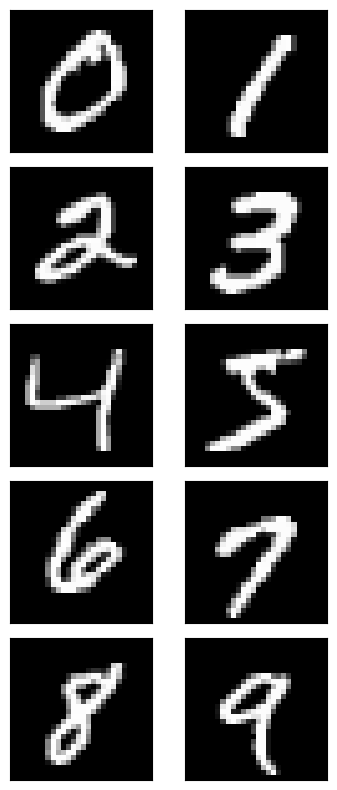

In [4]:
fig, axs_grid = plt.subplots(5, 2, dpi=100, sharex=True, sharey=True, figsize=(4, 8))
axs = axs_grid.flatten()

for i, ax in enumerate(axs):
    ind = np.where(labels == i)[0][0]
    img, label = MNISTdataset[ind]
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

Let's try to do a PCA on this dataset to see if we can identify differences in the features between one class and another. To do this, we need to flatten the images into a 1x768 vector so we can load it into the PCA function

In [5]:
z = np.zeros((len(MNISTdataset), 784))

for i, (img, label) in enumerate(tqdm.tqdm(MNISTdataset)):
    # flatten the 28x28 pixel image and store it in our database of vectors
    z[i] = np.asarray(img).flatten()

100%|█████████████████████████████████████████████████████████████████████████| 60000/60000 [00:03<00:00, 17050.37it/s]


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
reduced = pca.fit_transform(z)

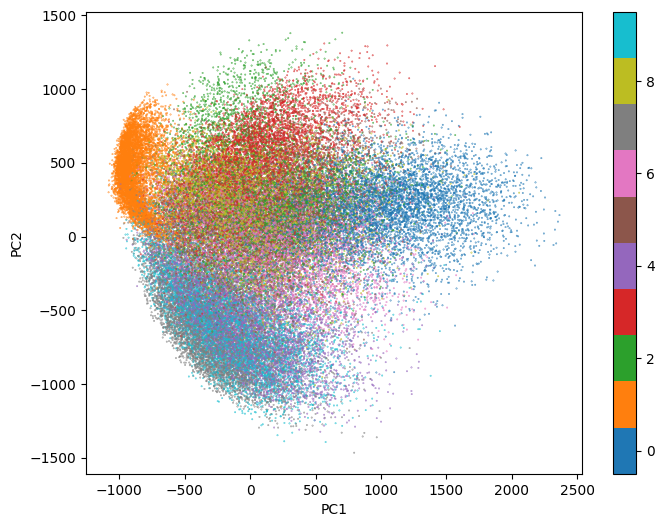

In [7]:
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(8, 6))

scatter = ax.scatter(reduced[:, 0], reduced[:, 1], s=0.1, c=labels, cmap='tab10', vmin=-0.5, vmax=9.5)
plt.colorbar(scatter)
ax.set_xlabel(r'PC1')
ax.set_ylabel(r'PC2')
plt.show()